# Processing the results of the Training Runs with Pretrained Models

First some imports

In [1]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## Handle the results of the pretrain runs

Next, we read all finalized CSV files from the given `input_directory` and produce a DataFrame. We also copy the DataFrame for later use and save its results to a CSV file.

In [2]:
input_directory = Path("./results/pretrain")
output_directory = Path("./results/pretrain")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["posttrain", "results.csv"],
    exclude=["checkpoint", "validation"],
)

We are only interested in the results of the polyhedral ground truth. Therefore, we filter the DataFrame.

In [3]:
df.insert(2, "pretrained_resolution", "100%")
# Replace the resolution of the posttrain-0,1,2 runs which used a pretrained model with 10% of the vertices
df.loc[df["output_folder"].str.contains("posttrain-0|posttrain-1|posttrain-2"), "pretrained_resolution"] = "10%"
df["pretrained_model"] = "Pretrained"
df.drop(columns=["low_resolution"], inplace=True)
df

,sample,pretrained_model,pretrained_resolution,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,0,2500,3,polyhedral,normalized_L1_loss,1000,...,2.381574e-08,0.000061,0.096599,0.126326,0.540285,0.221150,0.202954,0.216351,1.215290,0.418621
1,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,1,2500,3,polyhedral,normalized_L1_loss,1000,...,1.371360e-06,0.003516,0.615510,0.775692,2.353733,1.087862,0.709990,0.773686,2.422745,0.881652
2,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,2,2500,3,polyhedral,normalized_L1_loss,1000,...,1.802508e-07,0.000462,0.581420,0.732864,2.254805,0.999200,0.665124,0.722879,2.319343,0.844033
3,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,3,2500,3,polyhedral,normalized_L1_loss,1000,...,1.149877e-08,0.000029,0.092022,0.118712,0.619743,0.252369,0.202321,0.216283,1.239026,0.441554
4,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,4,2500,3,polyhedral,normalized_L1_loss,1000,...,3.766798e-06,0.009656,0.599718,0.759608,2.192614,0.940517,0.753959,0.808836,2.583756,0.911978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,churyumov-gerasimenko,Pretrained,10%,results/posttrain-2,85,2500,9,polyhedral,normalized_L1_loss,1000,...,5.203288e-06,0.013366,0.855147,1.078321,2.886700,1.180146,1.076937,1.156179,3.504347,1.242843
266,churyumov-gerasimenko,Pretrained,10%,results/posttrain-2,86,2500,9,polyhedral,normalized_L1_loss,1000,...,2.677260e-06,0.006870,0.750464,0.941746,2.723366,1.149601,0.904526,0.963905,3.150394,1.094627
267,churyumov-gerasimenko,Pretrained,10%,results/posttrain-2,87,2500,9,polyhedral,normalized_L1_loss,1000,...,8.758821e-08,0.000225,0.390837,0.498415,1.913890,0.962630,0.374480,0.406851,1.650917,0.597517
268,churyumov-gerasimenko,Pretrained,10%,results/posttrain-2,88,2500,9,polyhedral,normalized_L1_loss,1000,...,2.506339e-08,0.000064,0.084295,0.109145,0.626307,0.248632,0.174808,0.186339,1.103754,0.382337


In [4]:
df.to_csv(os.path.join(output_directory, "total_results_only_pretrain_churyumov-gerasimenko.csv"), index=False)

## Handle the results of the non-pretrained runs

Note that the file, `total_results_cg.csv` needs to be created before by using the appropriate notebook!

In [5]:
non_pretrained_df = csv_reader.read_result_csv(
    input_directory,
    files=[
        "./results/cg/total_results_churyumov-gerasimenko.csv"
    ]
)
non_pretrained_df.drop(columns=["pretrained_model", "low_resolution"], inplace=True)
non_pretrained_df.insert(1, "pretrained_resolution", "None")
non_pretrained_df.insert(1, "pretrained_model", "None")
non_pretrained_df

,sample,pretrained_model,pretrained_resolution,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-1999,0,2500,1999,polyhedral,normalized_L1_loss,1000,...,1.345977e-08,0.000035,0.026418,0.033961,0.374827,0.165426,0.054045,0.057224,0.391516,0.152814
1,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-1999,1,2500,1999,polyhedral,normalized_L1_loss,1000,...,1.563376e-08,0.000040,0.631426,0.789039,2.486944,1.222109,0.603926,0.652308,2.224196,0.800178
2,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-1999,2,2500,1999,polyhedral,normalized_L1_loss,1000,...,7.519427e-09,0.000019,0.523093,0.656178,2.153486,0.906739,0.599081,0.645885,2.247042,0.812963
3,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-1999,3,2500,1999,polyhedral,normalized_L1_loss,1000,...,1.291185e-07,0.000331,0.043948,0.055608,0.486524,0.193223,0.085930,0.092383,0.609533,0.216485
4,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-1999,4,2500,1999,polyhedral,normalized_L1_loss,1000,...,5.505671e-07,0.001413,0.710257,0.890139,2.648758,1.234736,0.750726,0.810724,2.634546,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,31,2500,2023,mascon,normalized_L1_loss,1000,...,3.546558e-07,0.000909,0.742448,0.937306,2.756093,1.291627,0.642516,0.695314,2.376003,0.865262
392,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,32,2500,2023,mascon,normalized_L1_loss,1000,...,2.384169e-07,0.000611,0.616820,0.776072,2.338498,1.031604,0.715005,0.775943,2.476317,0.898570
393,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,33,2500,2023,mascon,normalized_L1_loss,1000,...,1.801318e-07,0.000462,0.141083,0.185203,0.666376,0.315015,0.201434,0.220102,1.002989,0.388876
394,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,34,2500,2023,mascon,normalized_L1_loss,1000,...,1.069706e-06,0.002742,0.669674,0.839393,2.537880,1.179574,0.747790,0.807569,2.546966,0.910057


Concatenate the results of the pretrained and non-pretrained runs and save them to a shared CSV file.

In [6]:
df = pd.concat([df, non_pretrained_df], ignore_index=True)
df.to_csv(
    os.path.join(output_directory, "total_results_with_pretrain_churyumov-gerasimenko.csv"), index=False
)
df_copy = df.copy()
df

,sample,pretrained_model,pretrained_resolution,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,0,2500,3,polyhedral,normalized_L1_loss,1000,...,2.381574e-08,0.000061,0.096599,0.126326,0.540285,0.221150,0.202954,0.216351,1.215290,0.418621
1,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,1,2500,3,polyhedral,normalized_L1_loss,1000,...,1.371360e-06,0.003516,0.615510,0.775692,2.353733,1.087862,0.709990,0.773686,2.422745,0.881652
2,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,2,2500,3,polyhedral,normalized_L1_loss,1000,...,1.802508e-07,0.000462,0.581420,0.732864,2.254805,0.999200,0.665124,0.722879,2.319343,0.844033
3,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,3,2500,3,polyhedral,normalized_L1_loss,1000,...,1.149877e-08,0.000029,0.092022,0.118712,0.619743,0.252369,0.202321,0.216283,1.239026,0.441554
4,churyumov-gerasimenko,Pretrained,10%,results/posttrain-0,4,2500,3,polyhedral,normalized_L1_loss,1000,...,3.766798e-06,0.009656,0.599718,0.759608,2.192614,0.940517,0.753959,0.808836,2.583756,0.911978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,31,2500,2023,mascon,normalized_L1_loss,1000,...,3.546558e-07,0.000909,0.742448,0.937306,2.756093,1.291627,0.642516,0.695314,2.376003,0.865262
662,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,32,2500,2023,mascon,normalized_L1_loss,1000,...,2.384169e-07,0.000611,0.616820,0.776072,2.338498,1.031604,0.715005,0.775943,2.476317,0.898570
663,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,33,2500,2023,mascon,normalized_L1_loss,1000,...,1.801318e-07,0.000462,0.141083,0.185203,0.666376,0.315015,0.201434,0.220102,1.002989,0.388876
664,churyumov-gerasimenko,None,None,results/polyhedral-total-seed-2023,34,2500,2023,mascon,normalized_L1_loss,1000,...,1.069706e-06,0.002742,0.669674,0.839393,2.537880,1.179574,0.747790,0.807569,2.546966,0.910057


# Processing and Data Visualization

First, we filter the DataFrame for the polyhedral ground truth and the sample domain `[3.0, 5.0]`. Second, we select the columns of interest and drop the altitude columns. Third, we replace the standard altitudes.

In [7]:
df = df.loc[(df["sample_domain"] == "[3.0, 5.0]") & (df["ground_truth"] == "polyhedral")]

interesting_columns = ["pretrained_model", "pretrained_resolution", "sample_domain", "sample", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df

,pretrained_model,pretrained_resolution,sample_domain,sample,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,[''],0.646968,0.847598,0.376243,0.145501,0.110315,0.093120,0.009174,0.000551,0.000290,0.000061
1,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.057210,0.913345,0.849222,0.785677,0.761232,0.452826,0.261400,0.033281,0.017173,0.003516
2,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",0.903227,1.140363,0.846930,0.811558,1.010742,0.442023,0.219081,0.008231,0.003088,0.000462
3,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.429071,0.375304,0.639973,0.132235,0.098531,0.062991,0.006799,0.000268,0.000140,0.000029
4,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.913201,0.963369,1.015123,0.839400,0.799049,0.686624,0.553416,0.089363,0.046826,0.009656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.324301,0.932211,0.892273,0.797922,0.936383,0.433540,0.209627,0.011551,0.005205,0.001035
638,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",1.363384,1.361902,1.365050,1.339667,1.266813,0.791223,0.460448,0.119036,0.064027,0.013201
641,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.948493,0.800577,1.092662,0.799895,1.242604,0.265607,0.026175,0.000162,0.000080,0.000016
644,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.929598,0.895475,0.982717,1.062070,0.807375,0.446435,0.215656,0.017194,0.008374,0.001755


In [8]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


Time to replace the altitudes and make them more readable:

In [9]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,pretrained_model,pretrained_resolution,sample_domain,sample,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,[''],0.646968,0.847598,0.376243,0.145501,0.110315,0.093120,0.009174,0.000551,0.000290,0.000061
1,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.057210,0.913345,0.849222,0.785677,0.761232,0.452826,0.261400,0.033281,0.017173,0.003516
2,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",0.903227,1.140363,0.846930,0.811558,1.010742,0.442023,0.219081,0.008231,0.003088,0.000462
3,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.429071,0.375304,0.639973,0.132235,0.098531,0.062991,0.006799,0.000268,0.000140,0.000029
4,Pretrained,10%,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.913201,0.963369,1.015123,0.839400,0.799049,0.686624,0.553416,0.089363,0.046826,0.009656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.324301,0.932211,0.892273,0.797922,0.936383,0.433540,0.209627,0.011551,0.005205,0.001035
638,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",1.363384,1.361902,1.365050,1.339667,1.266813,0.791223,0.460448,0.119036,0.064027,0.013201
641,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.948493,0.800577,1.092662,0.799895,1.242604,0.265607,0.026175,0.000162,0.000080,0.000016
644,None,None,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.929598,0.895475,0.982717,1.062070,0.807375,0.446435,0.215656,0.017194,0.008374,0.001755


In [10]:
df.groupby(["noise", "pretrained_model"]).mean()

0.001  \
noise                                             pretrained_model             
['']                                              None              0.936926   
                                                  Pretrained        0.763938   
['adaptive_gaussian_noise', 0.001]                None              1.201561   
                                                  Pretrained        0.747888   
['adaptive_gaussian_noise', 0.01]                 None              0.908810   
                                                  Pretrained        0.625054   
['adaptive_gaussian_noise', 0.1]                  None              1.083804   
                                                  Pretrained        0.825056   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1.172893   
                                                  Pretrained        1.200838   
['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] None              1.399130   
                                                  Pretrained        1.277052   
['constant_bias', [0.000272, 0.0, 0.0]]           None              1.032776   
                                                  Pretrained        0.565483   
['gaussian', 0.0, 0.146731]                       None              1.221663   
                                                  Pretrained        1.192276   
['gaussian', 0.0, 1.467314]                       None              1.410946   
                                                  Pretrained        1.260885   

                                                                       0.005  \
noise                                             pretrained_model             
['']                                              None              0.910341   
                                                  Pretrained        0.501415   
['adaptive_gaussian_noise', 0.001]                None              0.881414   
                                                  Pretrained        0.628791   
['adaptive_gaussian_noise', 0.01]                 None              0.975376   
                                                  Pretrained        0.561329   
['adaptive_gaussian_noise', 0.1]                  None              0.790041   
                                                  Pretrained        0.725008   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1.122895   
                                                  Pretrained        1.261658   
['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] None              1.374645   
                                                  Pretrained        1.251922   
['constant_bias', [0.000272, 0.0, 0.0]]           None              0.938072   
                                                  Pretrained        0.574691   
['gaussian', 0.0, 0.146731]                       None              1.168851   
                                                  Pretrained        1.202384   
['gaussian', 0.0, 1.467314]                       None              1.365542   
                                                  Pretrained        1.253471   

                                                                        0.01  \
noise                                             pretrained_model             
['']                                              None              0.836092   
                                                  Pretrained        0.421484   
['adaptive_gaussian_noise', 0.001]                None              0.893584   
                                                  Pretrained        0.459775   
['adaptive_gaussian_noise', 0.01]                 None              0.750360   
                                                  Pretrained        0.405064   
['adaptive_gaussian_noise', 0.1]                  None              0.795776   
                                                  Pretrained        0.583874   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1

Time for plotting. We use the `relRMSE` as error of interest. We plot the results for the different noise levels and the different pretrained models. We also plot the 5% error threshold and the sample domain `[3.0, 5.0]`. We also plot the 0.312 km, 3.126 km, and 31.1266 km thresholds for easier comparison and mapping to real values.

In [11]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["pretrained_model", "noise"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,pretrained_model,noise,distance,relRMSE
0,Pretrained,[''],0.001,0.646968
1,Pretrained,"['gaussian', 0.0, 0.146731]",0.001,1.057210
2,Pretrained,"['gaussian', 0.0, 1.467314]",0.001,0.903227
3,Pretrained,"['constant_bias', [0.000272, 0.0, 0.0]]",0.001,0.429071
4,Pretrained,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.001,0.913201
...,...,...,...,...
3355,None,"['gaussian', 0.0, 0.146731]",50.000,0.001035
3356,None,"['gaussian', 0.0, 1.467314]",50.000,0.013201
3357,None,"['constant_bias', [0.000272, 0.0, 0.0]]",50.000,0.000016
3358,None,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",50.000,0.001755


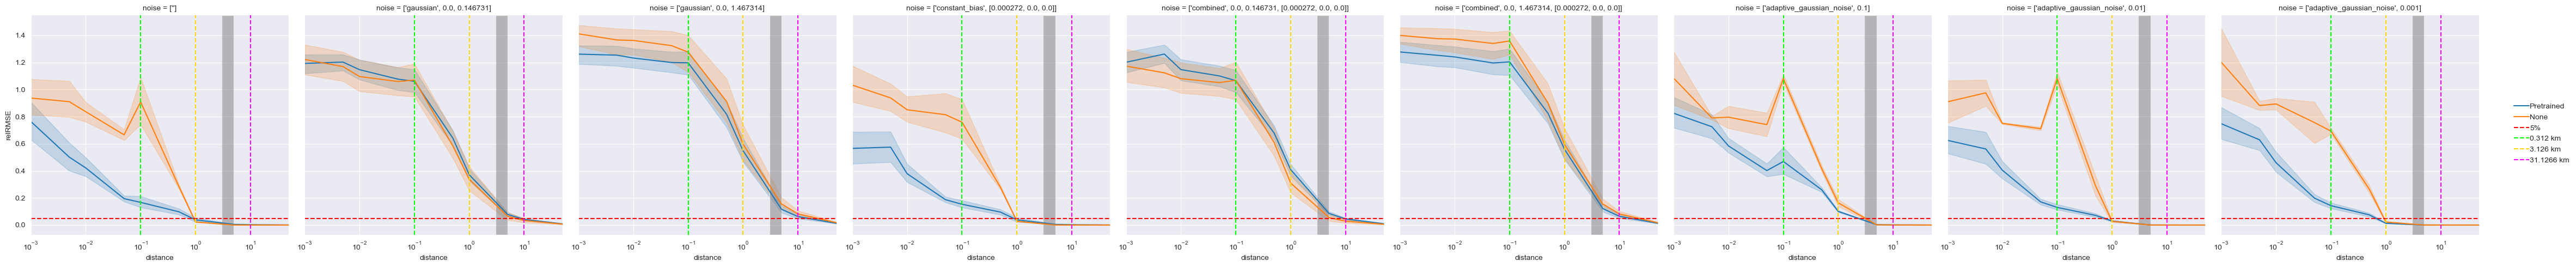

In [13]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="noise",
    hue="pretrained_model"
)
g.set(xlim=(0.001, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[0,:]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_pretrain_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)